In [1]:
#Underneath the Titanic's Deep Learning Competition: https://www.kaggle.com/c/titanic

In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab.data_table import DataTable
pd.set_option('display.max_columns', None)
DataTable.max_columns = 30

In [3]:
#Getting the data from github
!wget -O test.csv https://raw.githubusercontent.com/LozinskiMatthew/Titanic-DL-Kaggle_Competition/main/test.csv
!wget -O train.csv https://raw.githubusercontent.com/LozinskiMatthew/Titanic-DL-Kaggle_Competition/main/train.csv
test_data = pd.read_csv('../content/test.csv')
train_data = pd.read_csv('../content/train.csv')

--2024-08-15 20:01:41--  https://raw.githubusercontent.com/LozinskiMatthew/Titanic-DL-Kaggle_Competition/main/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28210 (28K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>]  27.55K  --.-KB/s    in 0.005s  

2024-08-15 20:01:42 (5.92 MB/s) - ‘test.csv’ saved [28210/28210]

--2024-08-15 20:01:42--  https://raw.githubusercontent.com/LozinskiMatthew/Titanic-DL-Kaggle_Competition/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 

In [4]:
train_data.head()
test_for_final_result = test_data.copy()

In [5]:
test_data['Cabin'].str[0].value_counts()

,count
Cabin,
C,35
B,18
D,13
E,9
F,8
A,7
G,1


In [6]:
train_data.info()
#I ought to fill Age, will do it with average age, it's logical
#About Cabin, I will analyse the (average) cabin (maybe I shall group them by frequency and randomly awrite them? But this wouldnt be optimal?)
#Embarked I will group by a letter, and then I will find the most frequent letter, adding it to two of these people

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
# sns.pairplot(train_data)

In [10]:
for_corr_1 = train_data.copy()
for_corr_2 = test_data.copy()
test_data.isnull().sum() #I will fulfill age and fare with their averages

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [11]:
finding_patterns = pd.concat([for_corr_1, for_corr_2], axis=0) # Concateneated to check what Should I write in the cabin,
finding_patterns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [12]:
train_data['Age'].fillna(value=finding_patterns['Age'].mean(), inplace=True)
test_data['Age'].fillna(value=finding_patterns['Age'].mean(), inplace=True)
test_data['Fare'].fillna(value=finding_patterns['Fare'].mean(), inplace=True)
#Basic transforms closed

In [13]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
for_corr_11 = train_data.copy()
for_corr_22 = test_data.copy()
finding_patterns_1 = pd.concat([for_corr_11, for_corr_22], axis=0) #Phase two, needed for inference. (To reckon/analyse)
finding_patterns_1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [15]:
finding_patterns_1['Embarked'].value_counts() # S with landslide lead, therefore I shall use it

,count
Embarked,
S,914
C,270
Q,123


In [16]:
train_data['Embarked'].fillna(value='S', inplace=True)
train_data['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [17]:
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,327


In [18]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [19]:
#Now I shall take care only of Cabin.
# finding_patterns_1.groupby('Cabin')['Survived'].mean()
finding_patterns_1 = finding_patterns_1.dropna(subset=['Cabin'])
finding_patterns_1['LetterInCabin'] = finding_patterns_1['Cabin'].str[0]
finding_patterns_1['LetterInCabin']
finding_patterns_1.groupby('LetterInCabin')['Survived'].mean()

<ipython-input-19-4ab448db251c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finding_patterns_1['LetterInCabin'] = finding_patterns_1['Cabin'].str[0]


,Survived
LetterInCabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000


In [20]:
#Somehow I ought to create a plot with some...
finding_patterns_1['LetterInCabin'].value_counts()
finding_patterns_1.dropna(subset=['Embarked'], inplace=True)
fpws = finding_patterns_1.copy() #finding patterns without survived, concatened via train and test sets
fpws.dropna(subset=['Survived'], inplace=True)

<ipython-input-20-17a2c23e9dd6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finding_patterns_1.dropna(subset=['Embarked'], inplace=True)


In [21]:
finding_patterns_1.isnull().sum()

,0
PassengerId,0
Survived,91
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [22]:
fpws.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [23]:
fpws.groupby('LetterInCabin')['Survived'].mean()

,Survived
LetterInCabin,
A,0.466667
B,0.733333
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000


Perhaps to achieve 'perfect' results I shall use feature engineering??? People with better prenouns, like Mr. Mrs. should have greater chances to survive, DL model required, linear solutions shouldn't work, too complex dataset, and Cabin too incomplete...

In [24]:
fpws['LetterInCabin'].value_counts()
#Maybe first I shall create a deep learning model, which will choose the right cabin's based on the passengers, values???
#But how will I manage the test dataset then???
# I will check for the propable accuracy, and then if needed I will create two subsequent models:
# e.t. First with survived, and then with test data, in order to assume which cabin's did these people have.

,count
LetterInCabin,
C,59
B,45
D,33
E,32
A,15
F,13
G,4
T,1


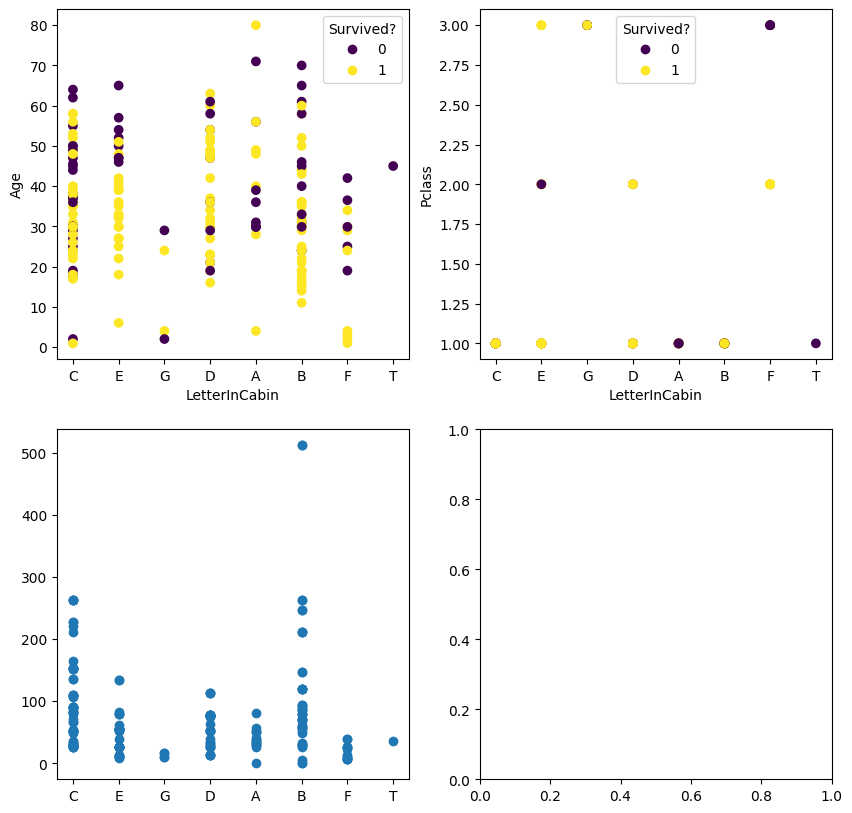

In [25]:
fig, ax = plt.subplots(
    figsize=(10, 10),
    nrows=2,
    ncols=2
)

scatter = ax[0][0].scatter(x=fpws['LetterInCabin'], y=fpws['Age'], c=fpws['Survived'], cmap='viridis')


ax[0][0].set(
    xlabel='LetterInCabin',
    ylabel='Age'
    )
ax[0][0].legend(title="Survived?", *scatter.legend_elements())

scatter_2 = ax[0][1].scatter(x=fpws['LetterInCabin'], y=fpws['Pclass'], c=fpws['Survived'], cmap='viridis')


ax[0][1].set(
    xlabel='LetterInCabin',
    ylabel='Pclass'
    )
ax[0][1].legend(title="Survived?", *scatter_2.legend_elements())

scatter_3 = ax[1][0].scatter(x=fpws['LetterInCabin'], y=fpws['Fare'])

In [26]:
finding_patterns_1[:50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LetterInCabin
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,C
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,C
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,E
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1,1,PP 9549,16.7000,G6,S,G
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,C103,S,C
21,22,1.0,2,"Beesley, Mr. Lawrence",male,34.000000,0,0,248698,13.0000,D56,S,D
23,24,1.0,1,"Sloper, Mr. William Thompson",male,28.000000,0,0,113788,35.5000,A6,S,A
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S,C
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.881138,1,0,PC 17569,146.5208,B78,C,B
52,53,1.0,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C,D


In [27]:
train_data['Survived'].value_counts()
# I need to create training data with only NaN in Desks
withna = train_data.copy()
withna = withna[withna['Cabin'].isnull()]
withna['Survived'].value_counts()

,count
Survived,
0,481
1,206


In [28]:
withnatest = test_data.copy()
withnatest = withnatest[withnatest['Cabin'].isnull()]
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,327


In [29]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [30]:
fpws['Survived'].value_counts()
# Ok, I have found another way, if somebody did not survive he is way likely to not have a Cabin in the data set
# Did it through the analysis of number of samples and their relative distribution

,count
Survived,
1.0,134
0.0,68


In [31]:
#Likelyhood of death in %
a = np.multiply(100, np.divide(481, 206 + 481))
b = np.multiply(100, np.divide(68, 134 + 68))
res = np.divide(b, a) # How many times more the likwelihood of death is in train set(reversed)
b
# Therefore we shall conclude a function which would have the likelyhood of giving 33.66% to a random person new cabin number 'N'
# Then what to do with dataset of testing?

33.663366336633665

In [32]:
fpws.value_counts()

,,,,,,,,,,,,,count
PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LetterInCabin,
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,C,1
622,1.0,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S,D,1
573,1.0,1,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0,0,PC 17474,26.3875,E25,S,E,1
578,1.0,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S,E,1
582,1.0,1,"Thayer, Mrs. John Borland (Marian Longstreth Morris)",female,39.0,1,1,17421,110.8833,C68,C,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,1.0,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C,C,1
328,1.0,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S,D,1
330,1.0,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C,B,1


In [33]:
'''
Maybe I shall do something with the ticket??
How to analyse it's presence?


'''

"\nMaybe I shall do something with the ticket??\nHow to analyse it's presence?\n\n\n"

In [34]:
unique_combinations = fpws[['Pclass', 'LetterInCabin']].drop_duplicates()
unique_combinations

,Pclass,LetterInCabin
1,1,C
6,1,E
10,3,G
21,2,D
23,1,A
31,1,B
52,1,D
66,2,F
75,3,F
123,2,E


In [35]:
def fillrnd(n: float):
  sol = np.random.rand()
  if sol > n:
    return 0
  else:
    return 1
    # N = 33.66

In [36]:
train_data.isnull().sum()
train_data['LetterInCabin'] = train_data['Cabin'].str[0]
train_data['LetterInCabin'].fillna(value='N', inplace=True)
train_data['Survived'].fillna(value = fillrnd(33.66), inplace=True)
train_data.drop(columns=['Cabin'], inplace=True)

In [37]:
test_data['LetterInCabin'] = test_data['Cabin'].str[0]
test_data['LetterInCabin'].fillna(value='N', inplace=True)
test_data.drop(columns=['Cabin'], inplace=True)

In [38]:
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [39]:
# Letter in Cabin changed in math order to prepare it for OneHotEncoding
train_data['Ticket'].value_counts()
# So I shall encode them within such manner.

,count
Ticket,
347082,7
CA. 2343,7
1601,7
3101295,6
CA 2144,6
...,...
9234,1
19988,1
2693,1


In [40]:
# So now I will drop the names columns BUT note that it should and I will create a data engineering pipeline for it
# E.t. sometimes . like mr. or mrs. occurs which indicates higher feasibility in terms of logic of their survivorship!
train_data.drop(columns=['Name'], inplace=True)
test_data.drop(columns=['Name'], inplace=True)

In [41]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LetterInCabin
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S,N
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,N
3,4,1,1,female,35.000000,1,0,113803,53.1000,S,C
4,5,0,3,male,35.000000,0,0,373450,8.0500,S,N
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,S,N
887,888,1,1,female,19.000000,0,0,112053,30.0000,S,B
888,889,0,3,female,29.881138,1,2,W./C. 6607,23.4500,S,N
889,890,1,1,male,26.000000,0,0,111369,30.0000,C,C


In [42]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LetterInCabin
0,892,3,male,34.500000,0,0,330911,7.8292,Q,N
1,893,3,female,47.000000,1,0,363272,7.0000,S,N
2,894,2,male,62.000000,0,0,240276,9.6875,Q,N
3,895,3,male,27.000000,0,0,315154,8.6625,S,N
4,896,3,female,22.000000,1,1,3101298,12.2875,S,N
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,29.881138,0,0,A.5. 3236,8.0500,S,N
414,1306,1,female,39.000000,0,0,PC 17758,108.9000,C,C
415,1307,3,male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,N
416,1308,3,male,29.881138,0,0,359309,8.0500,S,N


In [43]:
train_data['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [44]:
train_data.head(1) #To standardize -> PassengerId, Age, SibSp, Parch, Fare

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LetterInCabin
0,1,0,3,male,22.0,1,0,A/5 21171,7.25,S,N


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ready_train_dataset_scaled = scaler.fit_transform(train_data.drop(['Sex', 'Survived', 'Pclass', 'Ticket', 'Embarked', 'LetterInCabin'], axis=1))
ready_train_dataset_scaled_df = pd.DataFrame(data=ready_train_dataset_scaled, columns=train_data.drop(['Sex', 'Survived', 'Pclass', 'Ticket', 'Embarked', 'LetterInCabin'], axis=1).columns)
train_data = pd.concat([train_data.drop(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare'], axis=1), ready_train_dataset_scaled_df], axis=1)
ready_test_dataset_scaled = scaler.fit_transform(test_data.drop(['Sex', 'Pclass', 'Ticket', 'Embarked', 'LetterInCabin'], axis=1))
ready_test_dataset_scaled_df = pd.DataFrame(data=ready_test_dataset_scaled, columns=test_data.drop(['Sex', 'Pclass', 'Ticket', 'Embarked', 'LetterInCabin'], axis=1).columns)
test_data = pd.concat([test_data.drop(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare'], axis=1), ready_test_dataset_scaled_df], axis=1)

In [46]:
#One Hot Encoding: Pclass(logic conveys that this should occur, e.t. huge discrepancy), Sex, Ticket, Embarked and
# LetterInCabin
# , what about SibSp and Parch??? For now I will leave it.
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

embarked_encoded_train = ohe.fit_transform(train_data[['Embarked']])
embarked_train_df = pd.DataFrame(data=embarked_encoded_train, columns=ohe.categories_)
embarked_encoded_test = ohe.fit_transform(test_data[['Embarked']])
embarked_test_df = pd.DataFrame(data=embarked_encoded_test, columns=ohe.categories_)
pclass_encoded_train = ohe.fit_transform(train_data['Pclass'].values.reshape(len(train_data), 1))
pclass_train_df = pd.DataFrame(data=pclass_encoded_train, columns=['Low', 'Mid', 'High']) #For convinience and better comprehension
pclass_encoded_test = ohe.fit_transform(test_data['Pclass'].values.reshape(len(test_data), 1))
pclass_test_df = pd.DataFrame(data=pclass_encoded_test, columns=['Low', 'Mid', 'High'])
sex_encoded_train = ohe.fit_transform(train_data[['Sex']]) # Wow it is shortening for reshape in this context for y is 1!!
sex_train_df = pd.DataFrame(data=sex_encoded_train, columns=['Female', 'Male'])
sex_encoded_test = ohe.fit_transform(test_data[['Sex']])
sex_test_df = pd.DataFrame(data=sex_encoded_test, columns=['Female', 'Male'])
letter_encoded_train = ohe.fit_transform(train_data[['LetterInCabin']])
letter_train_df = pd.DataFrame(data=letter_encoded_train, columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'N'])
letter_encoded_test = ohe.fit_transform(test_data[['LetterInCabin']])
letter_test_df = pd.DataFrame(data=letter_encoded_test, columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N'])
ticket_encoded_train = ohe.fit_transform(train_data[['Ticket']])
ticket_train_df = pd.DataFrame(data=ticket_encoded_train, columns=ohe.categories_)
ticket_encoded_test = ohe.fit_transform(test_data[['Ticket']])
ticket_test_df = pd.DataFrame(data=ticket_encoded_test, columns=ohe.categories_)

In [47]:
final_train_data = pd.concat([train_data.drop(['Pclass', 'Sex', 'Ticket', 'Embarked', 'LetterInCabin'], axis=1), embarked_train_df, pclass_train_df, sex_train_df, letter_train_df, ticket_train_df], axis=1)
final_test_data = pd.concat([test_data.drop(['Pclass', 'Sex', 'Ticket', 'Embarked', 'LetterInCabin'], axis=1), embarked_test_df, pclass_test_df, sex_test_df, letter_test_df, ticket_test_df], axis=1)
final_test_data = final_test_data.reindex(columns=final_train_data.columns, fill_value=0.0)
final_test_data.drop(columns=['Survived'], inplace=True)

In [48]:
final_train_data

,Survived,PassengerId,Age,SibSp,Parch,Fare,"(C,)","(Q,)","(S,)",Low,Mid,High,Female,Male,A,B,C,D,E,F,G,H,N,"(110152,)","(110413,)","(110465,)","(110564,)","(110813,)","(111240,)","(111320,)","(111361,)","(111369,)","(111426,)","(111427,)","(111428,)","(112050,)","(112052,)","(112053,)","(112058,)","(112059,)","(112277,)","(112379,)","(113028,)","(113043,)","(113050,)","(113051,)","(113055,)","(113056,)","(113059,)","(113501,)","(113503,)","(113505,)","(113509,)","(113510,)","(113514,)","(113572,)","(113760,)","(113767,)","(113773,)","(113776,)","(113781,)","(113783,)","(113784,)","(113786,)","(113787,)","(113788,)","(113789,)","(113792,)","(113794,)","(113796,)","(113798,)","(113800,)","(113803,)","(113804,)","(113806,)","(113807,)","(11668,)","(11751,)","(11752,)","(11753,)","(11755,)","(11765,)","(11767,)","(11769,)","(11771,)","(11774,)","(11813,)","(11967,)","(12233,)","(12460,)","(12749,)","(13049,)","(13213,)","(13214,)","(13502,)","(13507,)","(13509,)","(13567,)","(13568,)","(14311,)","(14312,)","(14313,)","(14973,)","(1601,)","(16966,)","(16988,)","(17421,)","(17453,)","(17463,)","(17464,)","(17465,)","(17466,)","(17474,)","(17764,)","(19877,)","(19928,)","(19943,)","(19947,)","(19950,)","(19952,)","(19972,)","(19988,)","(19996,)","(2003,)","(211536,)","(21440,)","(218629,)","(219533,)","(220367,)","(220845,)","(2223,)","(223596,)","(226593,)","(226875,)","(228414,)","(229236,)","(230080,)","(230136,)","(230433,)","(230434,)","(231919,)","(231945,)","(233639,)","(233866,)","(234360,)","(234604,)","(234686,)","(234818,)","(236171,)","(236852,)","(236853,)","(237442,)","(237565,)","(237668,)","(237671,)","(237736,)","(237789,)","(237798,)","(239853,)","(239854,)","(239855,)","(239856,)","(239865,)","(240929,)","(24160,)","(243847,)","(243880,)","(244252,)","(244270,)","(244278,)","(244310,)","(244358,)","(244361,)","(244367,)","(244373,)","(248698,)","(248706,)","(248723,)","(248727,)","(248731,)","(248733,)","(248738,)","(248740,)","(248747,)","(250643,)","(250644,)","(250646,)","(250647,)","(250648,)","(250649,)","(250651,)","(250652,)","(250653,)","(250655,)","(2620,)","(2623,)","(2624,)","(2625,)","(2626,)","(2627,)","(2628,)","(2629,)","(2631,)","(26360,)","(2641,)","(2647,)","(2648,)","(2649,)","(2650,)","(2651,)","(2653,)","(2659,)","(2661,)","(2662,)","(2663,)","(2664,)","(2665,)","(2666,)","(2667,)","(2668,)","(2669,)","(26707,)","(2671,)","(2672,)","(2674,)","(2677,)","(2678,)","(2680,)","(2683,)","(2685,)","(2686,)","(2687,)","(2689,)","(2690,)","(2691,)","(2693,)","(2694,)","(2695,)","(2697,)","(2699,)","(2700,)","(27042,)","(27267,)","(27849,)","(28134,)","(28206,)","(28213,)","(28220,)","(28228,)","(28403,)","(28424,)","(28425,)","(28551,)","(28664,)","(28665,)","(29011,)","(2908,)","(29103,)","(29104,)","(29105,)","(29106,)","(29108,)","(2926,)","(29750,)","(29751,)","(3101264,)","(3101265,)","(3101267,)","(3101276,)","(3101277,)","(3101278,)","(3101281,)","(3101295,)","(3101296,)","(3101298,)","(31027,)","(31028,)","(312991,)","(312992,)","(312993,)","(31418,)","(315037,)","(315082,)","(315084,)","(315086,)","(315088,)","(315089,)","(315090,)","(315093,)","(315094,)","(315096,)","(315097,)","(315098,)","(315151,)","(315153,)","(323592,)","(323951,)","(324669,)","(330877,)","(330909,)","(330919,)","(330923,)","(330931,)","(330932,)","(330935,)","(330958,)","(330959,)","(330979,)","(330980,)","(334912,)","(335097,)","(335677,)","(33638,)","(336439,)","(3411,)","(341826,)","(34218,)","(342826,)","(343095,)","(343120,)","(343275,)","(343276,)","(345364,)","(345572,)","(345763,)","(345764,)","(345765,)","(345767,)","(345769,)","(345770,)","(345773,)","(345774,)","(345777,)","(345778,)","(345779,)","(345780,)","(345781,)","(345783,)","(3460,)","(347054,)","(347060,)","(347061,)","(347062,)","(347063,)","(347064,)","(347067,)","(347068,)","(347069,)","(347071,)","(347073,)","(347074,)","(347076,)","(347077,)","(347078,)","(347080,)","(347081,)","(347082,)","(347083,)","(347085,)","(347087,)","(347088,)","(347089

In [49]:
train_data.dtypes #SibSp, Pclass, Survived, PassengerId to floats
final_train_data['SibSp'] =  final_train_data['SibSp'].astype('float64')
final_train_data['Parch'] =  final_train_data['Parch'].astype('float64')
final_train_data['Survived'] =  final_train_data['Survived'].astype('float64')
final_train_data['PassengerId'] =  final_train_data['PassengerId'].astype('float64')
#Test dataset
final_test_data['SibSp'] =  final_test_data['SibSp'].astype('float64')
final_test_data['Parch'] =  final_test_data['Parch'].astype('float64')
final_test_data['PassengerId'] =  final_test_data['PassengerId'].astype('float64')

In [50]:
#No time for more for today, all hot encoded, now I shall concatenate the data
final_test_data # To standardize -> PassengerId, Age, SibSp, Parch, Fare

,PassengerId,Age,SibSp,Parch,Fare,"(C,)","(Q,)","(S,)",Low,Mid,High,Female,Male,A,B,C,D,E,F,G,H,N,"(110152,)","(110413,)","(110465,)","(110564,)","(110813,)","(111240,)","(111320,)","(111361,)","(111369,)","(111426,)","(111427,)","(111428,)","(112050,)","(112052,)","(112053,)","(112058,)","(112059,)","(112277,)","(112379,)","(113028,)","(113043,)","(113050,)","(113051,)","(113055,)","(113056,)","(113059,)","(113501,)","(113503,)","(113505,)","(113509,)","(113510,)","(113514,)","(113572,)","(113760,)","(113767,)","(113773,)","(113776,)","(113781,)","(113783,)","(113784,)","(113786,)","(113787,)","(113788,)","(113789,)","(113792,)","(113794,)","(113796,)","(113798,)","(113800,)","(113803,)","(113804,)","(113806,)","(113807,)","(11668,)","(11751,)","(11752,)","(11753,)","(11755,)","(11765,)","(11767,)","(11769,)","(11771,)","(11774,)","(11813,)","(11967,)","(12233,)","(12460,)","(12749,)","(13049,)","(13213,)","(13214,)","(13502,)","(13507,)","(13509,)","(13567,)","(13568,)","(14311,)","(14312,)","(14313,)","(14973,)","(1601,)","(16966,)","(16988,)","(17421,)","(17453,)","(17463,)","(17464,)","(17465,)","(17466,)","(17474,)","(17764,)","(19877,)","(19928,)","(19943,)","(19947,)","(19950,)","(19952,)","(19972,)","(19988,)","(19996,)","(2003,)","(211536,)","(21440,)","(218629,)","(219533,)","(220367,)","(220845,)","(2223,)","(223596,)","(226593,)","(226875,)","(228414,)","(229236,)","(230080,)","(230136,)","(230433,)","(230434,)","(231919,)","(231945,)","(233639,)","(233866,)","(234360,)","(234604,)","(234686,)","(234818,)","(236171,)","(236852,)","(236853,)","(237442,)","(237565,)","(237668,)","(237671,)","(237736,)","(237789,)","(237798,)","(239853,)","(239854,)","(239855,)","(239856,)","(239865,)","(240929,)","(24160,)","(243847,)","(243880,)","(244252,)","(244270,)","(244278,)","(244310,)","(244358,)","(244361,)","(244367,)","(244373,)","(248698,)","(248706,)","(248723,)","(248727,)","(248731,)","(248733,)","(248738,)","(248740,)","(248747,)","(250643,)","(250644,)","(250646,)","(250647,)","(250648,)","(250649,)","(250651,)","(250652,)","(250653,)","(250655,)","(2620,)","(2623,)","(2624,)","(2625,)","(2626,)","(2627,)","(2628,)","(2629,)","(2631,)","(26360,)","(2641,)","(2647,)","(2648,)","(2649,)","(2650,)","(2651,)","(2653,)","(2659,)","(2661,)","(2662,)","(2663,)","(2664,)","(2665,)","(2666,)","(2667,)","(2668,)","(2669,)","(26707,)","(2671,)","(2672,)","(2674,)","(2677,)","(2678,)","(2680,)","(2683,)","(2685,)","(2686,)","(2687,)","(2689,)","(2690,)","(2691,)","(2693,)","(2694,)","(2695,)","(2697,)","(2699,)","(2700,)","(27042,)","(27267,)","(27849,)","(28134,)","(28206,)","(28213,)","(28220,)","(28228,)","(28403,)","(28424,)","(28425,)","(28551,)","(28664,)","(28665,)","(29011,)","(2908,)","(29103,)","(29104,)","(29105,)","(29106,)","(29108,)","(2926,)","(29750,)","(29751,)","(3101264,)","(3101265,)","(3101267,)","(3101276,)","(3101277,)","(3101278,)","(3101281,)","(3101295,)","(3101296,)","(3101298,)","(31027,)","(31028,)","(312991,)","(312992,)","(312993,)","(31418,)","(315037,)","(315082,)","(315084,)","(315086,)","(315088,)","(315089,)","(315090,)","(315093,)","(315094,)","(315096,)","(315097,)","(315098,)","(315151,)","(315153,)","(323592,)","(323951,)","(324669,)","(330877,)","(330909,)","(330919,)","(330923,)","(330931,)","(330932,)","(330935,)","(330958,)","(330959,)","(330979,)","(330980,)","(334912,)","(335097,)","(335677,)","(33638,)","(336439,)","(3411,)","(341826,)","(34218,)","(342826,)","(343095,)","(343120,)","(343275,)","(343276,)","(345364,)","(345572,)","(345763,)","(345764,)","(345765,)","(345767,)","(345769,)","(345770,)","(345773,)","(345774,)","(345777,)","(345778,)","(345779,)","(345780,)","(345781,)","(345783,)","(3460,)","(347054,)","(347060,)","(347061,)","(347062,)","(347063,)","(347064,)","(347067,)","(347068,)","(347069,)","(347071,)","(347073,)","(347074,)","(347076,)","(347077,)","(347078,)","(347080,)","(347081,)","(347082,)","(347083,)","(347085,)","(347087,)","(347088,)","(347089,)","(347

In [51]:
final_train_data_labels = final_train_data.drop(columns=['Survived'])
final_train_data_target = final_train_data['Survived']
divisor = np.round(float(len(final_train_data)) * 85 / 100)
divisor = int(divisor)

In [52]:
train_np_labels = final_train_data_labels[:divisor].to_numpy()
train_np_labels = final_train_data_target[:divisor].to_numpy()
valid_np_labels = final_train_data_labels[divisor:].to_numpy()
valid_np_target = final_train_data_target[divisor:].to_numpy()
test_np = final_test_data.to_numpy()
test_np

array([[-1.72791209,  0.34134784, -0.49947002, ...,  0.        ,
         0.        ,  0.        ],
       [-1.71962474,  1.33180741,  0.61699237, ...,  0.        ,
         0.        ,  0.        ],
       [-1.71133739,  2.52035889, -0.49947002, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.71133739,  0.65829491, -0.49947002, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.71962474, -0.02463587, -0.49947002, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.72791209, -0.02463587,  0.61699237, ...,  0.        ,
         0.        ,  0.        ]])

In [63]:
class CallbackCreator(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}:")
        print(f" - Loss: {logs['loss']}")
        print(f" - Accuracy: {logs['accuracy']}")
        print(f" - Precision: {logs['precision']}")
        print(f" - Validation Loss: {logs['val_loss']}")
        print(f" - Validation mae: {logs['val_accuracy']}")
        print(f" = Validation Precision: {logs['val_precision']}")

In [65]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation='elu'),
    tf.keras.layers.Dense(100, activation='elu'),
    tf.keras.layers.Dense(50, activation='elu'),
    tf.keras.layers.Dense(10, activation='elu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

loss = tf.keras.losses.BinaryFocalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

model_0.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=['accuracy', 'precision']

)

callback = CallbackCreator()

#model_0.fit(final_train_data_labels, final_train_data_target, epochs=100, callbacks=([callback]), validation_data = (valid_np_labels, valid_np_target)) #For train data, I must divide it/split it into validation and training sets
model_0.fit(final_train_data_labels, final_train_data_target, epochs=100, callbacks=([callback]))

model.predict(valid_np_labels, valid_np_target)



Epoch 1/100
25/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7663 - loss: 0.1295 - precision: 0.7471Epoch 1:
 - Loss: 0.12231242656707764
 - Accuracy: 0.7890011072158813
 - Precision: 0.7583892345428467


KeyError: 'val_loss'

In [55]:
#First model deployed, extremely promising results!!!
# final_result = final_test_data  test_for_final_result
# final_test_data['Survived'] = model_0.predict(x=test_np, verbose=1)
final_test_data.head()

,PassengerId,Age,SibSp,Parch,Fare,"(C,)","(Q,)","(S,)",Low,Mid,High,Female,Male,A,B,C,D,E,F,G,H,N,"(110152,)","(110413,)","(110465,)","(110564,)","(110813,)","(111240,)","(111320,)","(111361,)","(111369,)","(111426,)","(111427,)","(111428,)","(112050,)","(112052,)","(112053,)","(112058,)","(112059,)","(112277,)","(112379,)","(113028,)","(113043,)","(113050,)","(113051,)","(113055,)","(113056,)","(113059,)","(113501,)","(113503,)","(113505,)","(113509,)","(113510,)","(113514,)","(113572,)","(113760,)","(113767,)","(113773,)","(113776,)","(113781,)","(113783,)","(113784,)","(113786,)","(113787,)","(113788,)","(113789,)","(113792,)","(113794,)","(113796,)","(113798,)","(113800,)","(113803,)","(113804,)","(113806,)","(113807,)","(11668,)","(11751,)","(11752,)","(11753,)","(11755,)","(11765,)","(11767,)","(11769,)","(11771,)","(11774,)","(11813,)","(11967,)","(12233,)","(12460,)","(12749,)","(13049,)","(13213,)","(13214,)","(13502,)","(13507,)","(13509,)","(13567,)","(13568,)","(14311,)","(14312,)","(14313,)","(14973,)","(1601,)","(16966,)","(16988,)","(17421,)","(17453,)","(17463,)","(17464,)","(17465,)","(17466,)","(17474,)","(17764,)","(19877,)","(19928,)","(19943,)","(19947,)","(19950,)","(19952,)","(19972,)","(19988,)","(19996,)","(2003,)","(211536,)","(21440,)","(218629,)","(219533,)","(220367,)","(220845,)","(2223,)","(223596,)","(226593,)","(226875,)","(228414,)","(229236,)","(230080,)","(230136,)","(230433,)","(230434,)","(231919,)","(231945,)","(233639,)","(233866,)","(234360,)","(234604,)","(234686,)","(234818,)","(236171,)","(236852,)","(236853,)","(237442,)","(237565,)","(237668,)","(237671,)","(237736,)","(237789,)","(237798,)","(239853,)","(239854,)","(239855,)","(239856,)","(239865,)","(240929,)","(24160,)","(243847,)","(243880,)","(244252,)","(244270,)","(244278,)","(244310,)","(244358,)","(244361,)","(244367,)","(244373,)","(248698,)","(248706,)","(248723,)","(248727,)","(248731,)","(248733,)","(248738,)","(248740,)","(248747,)","(250643,)","(250644,)","(250646,)","(250647,)","(250648,)","(250649,)","(250651,)","(250652,)","(250653,)","(250655,)","(2620,)","(2623,)","(2624,)","(2625,)","(2626,)","(2627,)","(2628,)","(2629,)","(2631,)","(26360,)","(2641,)","(2647,)","(2648,)","(2649,)","(2650,)","(2651,)","(2653,)","(2659,)","(2661,)","(2662,)","(2663,)","(2664,)","(2665,)","(2666,)","(2667,)","(2668,)","(2669,)","(26707,)","(2671,)","(2672,)","(2674,)","(2677,)","(2678,)","(2680,)","(2683,)","(2685,)","(2686,)","(2687,)","(2689,)","(2690,)","(2691,)","(2693,)","(2694,)","(2695,)","(2697,)","(2699,)","(2700,)","(27042,)","(27267,)","(27849,)","(28134,)","(28206,)","(28213,)","(28220,)","(28228,)","(28403,)","(28424,)","(28425,)","(28551,)","(28664,)","(28665,)","(29011,)","(2908,)","(29103,)","(29104,)","(29105,)","(29106,)","(29108,)","(2926,)","(29750,)","(29751,)","(3101264,)","(3101265,)","(3101267,)","(3101276,)","(3101277,)","(3101278,)","(3101281,)","(3101295,)","(3101296,)","(3101298,)","(31027,)","(31028,)","(312991,)","(312992,)","(312993,)","(31418,)","(315037,)","(315082,)","(315084,)","(315086,)","(315088,)","(315089,)","(315090,)","(315093,)","(315094,)","(315096,)","(315097,)","(315098,)","(315151,)","(315153,)","(323592,)","(323951,)","(324669,)","(330877,)","(330909,)","(330919,)","(330923,)","(330931,)","(330932,)","(330935,)","(330958,)","(330959,)","(330979,)","(330980,)","(334912,)","(335097,)","(335677,)","(33638,)","(336439,)","(3411,)","(341826,)","(34218,)","(342826,)","(343095,)","(343120,)","(343275,)","(343276,)","(345364,)","(345572,)","(345763,)","(345764,)","(345765,)","(345767,)","(345769,)","(345770,)","(345773,)","(345774,)","(345777,)","(345778,)","(345779,)","(345780,)","(345781,)","(345783,)","(3460,)","(347054,)","(347060,)","(347061,)","(347062,)","(347063,)","(347064,)","(347067,)","(347068,)","(347069,)","(347071,)","(347073,)","(347074,)","(347076,)","(347077,)","(347078,)","(347080,)","(347081,)","(347082,)","(347083,)","(347085,)","(347087,)","(347088,)","(347089,)","(347

In [56]:
test_data_v2 = pd.read_csv('../content/test.csv')
final_result = pd.DataFrame(data=test_data_v2['PassengerId'], columns=['PassengerId'])
final_result

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [57]:
test_length = len(final_test_data)

for i in range(test_length):
    input_data = final_test_data.iloc[i].values.reshape(1, -1)
    prediction = np.round(model_0.predict(input_data, verbose=1))
    final_result.loc[i, 'Survived'] = prediction
    print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.]]
1/1 ━━━━━━

To solve: there is a problem with proprocessing on the test data, e.t. the number of columns must match the number of columns in training dataset (how else would my model predict on the test, when there will be different number of variables.)

In [58]:
final_result.to_csv('submission.csv', index=False)

In [59]:
#RESULTS NUMBER ONE

The problem appears to be with the interpretation of the data... With wrongly chosen metrics...